# 0 Importar librerías y habilitar el uso de datos de drive

In [0]:
import numpy as np
import pickle
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1 Visualización con t-SNE usando sólo las *Features*

## 1.1 Cargar datos

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
#ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/clases.pkl','rb') as f: 
  datos1 = pickle.load(f)
    
Nombre , Clase1, Clase2 = datos1[0], datos1[1], datos1[2]

with open(ruta_base+'/char_B.pkl','rb') as f: 
  features_B = pickle.load(f)

## 1.2 Entrenar t-SNE

In [18]:
X = features_B 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=5, perplexity=60, n_iter=500)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 28604 samples in 0.027s...
[t-SNE] Computed neighbors for 28604 samples in 3.611s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28604
[t-SNE] Computed conditional probabilities for sample 2000 / 28604
[t-SNE] Computed conditional probabilities for sample 3000 / 28604
[t-SNE] Computed conditional probabilities for sample 4000 / 28604
[t-SNE] Computed conditional probabilities for sample 5000 / 28604
[t-SNE] Computed conditional probabilities for sample 6000 / 28604
[t-SNE] Computed conditional probabilities for sample 7000 / 28604
[t-SNE] Computed conditional probabilities for sample 8000 / 28604
[t-SNE] Computed conditional probabilities for sample 9000 / 28604
[t-SNE] Computed conditional probabilities for sample 10000 / 28604
[t-SNE] Computed conditional probabilities for sample 11000 / 28604
[t-SNE] Computed conditional probabilities for sample 12000 / 28604
[t-SNE] Computed conditional probabilities for sa

In [0]:
with open('tSNE_perp40_iter1000_charB.pkl','wb') as f:
  pickle.dump([tsne_results[:,0] , tsne_results[:,1]],f)

## 1.3 Visualizar con 3 clases

In [0]:
t = np.zeros(len(Clase1), dtype=int)
for i in range(len(Clase1)):
  if Clase1[i]=='CEPH':
    t[i]=0
  elif Clase1[i]=='EB':
    t[i]=1
  else:
    t[i]=2

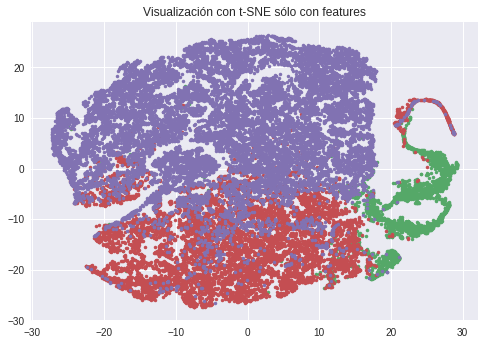

In [19]:
#with open('tSNE_perp30_iter750_charB.pkl','rb') as f: 
#  datos1 = pickle.load(f)
  
#x_tsne = datos1[0]
#y_tsne = datos1[1]
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in range(len(features_B)):
  if t[i]==0 :
    x1.append(x_tsne[i])
    y1.append(y_tsne[i])
  elif t[i]==1:
    x2.append(x_tsne[i])
    y2.append(y_tsne[i])
  else:
    x3.append(x_tsne[i])
    y3.append(y_tsne[i])
plt.plot(x1,y1,'C1.')
#plt.scatter(x1, y1, s=area, c=colors, alpha=0.5)
plt.plot(x2,y2,'C2.')
plt.plot(x3,y3,'C3.')
plt.title('Visualización con t-SNE sólo con features')

plt.savefig('B_perp60.png')

In [0]:
with open('tSNE_30_250.pkl','wb') as f:
  pickle.dump([x1,x2,x3,y1,y2,y3],f)

# 2 Visualizar con t-SNE usando las *Features* y el Periodo

## 2.1 Cargar datos

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
#ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/clases.pkl','rb') as f: 
  datos1 = pickle.load(f)
    
Nombre , Clase1, Clase2 = datos1[0], datos1[1], datos1[2]

with open(ruta_base+'/LC_fase_B.pkl','rb') as f: 
  features_B = pickle.load(f)
    
with open(ruta_base+'/datos.pkl','rb') as f:
  datos =  pickle.load(f)
  
Periodo = datos[1]
del datos

In [0]:
#features_B = features_B.tolist()
for i in range(len(features_B)):
  features_B[i] = features_B[i].tolist()
  features_B[i].insert(0,Periodo[i])
  features_B[i] = np.array(features_B[i])
  
features_B = np.array(features_B)

## 2.2 Entrenar t-SNE

In [73]:
#X = StandardScaler().fit_transform(features_B) # datos normalizados
X = features_B 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=5, perplexity=35, n_iter=500)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 28604 samples in 0.055s...
[t-SNE] Computed neighbors for 28604 samples in 26.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28604
[t-SNE] Computed conditional probabilities for sample 2000 / 28604
[t-SNE] Computed conditional probabilities for sample 3000 / 28604
[t-SNE] Computed conditional probabilities for sample 4000 / 28604
[t-SNE] Computed conditional probabilities for sample 5000 / 28604
[t-SNE] Computed conditional probabilities for sample 6000 / 28604
[t-SNE] Computed conditional probabilities for sample 7000 / 28604
[t-SNE] Computed conditional probabilities for sample 8000 / 28604
[t-SNE] Computed conditional probabilities for sample 9000 / 28604
[t-SNE] Computed conditional probabilities for sample 10000 / 28604
[t-SNE] Computed conditional probabilities for sample 11000 / 28604
[t-SNE] Computed conditional probabilities for sample 12000 / 28604
[t-SNE] Computed conditional probabilities for s

In [0]:
with open('tSNE_Features_Periodo.pkl','wb') as f:
  pickle.dump([tsne_results[:,0] , tsne_results[:,1]],f)

## 2.3 Visualizar con 3 clases

In [0]:
t = np.zeros(len(Clase1), dtype=int)
for i in range(len(Clase1)):
  if Clase1[i]=='CEPH':
    t[i]=0
  elif Clase1[i]=='EB':
    t[i]=1
  else:
    t[i]=2

In [0]:
import random
subsample=[]
for i in range(2500):
  r=random.randint(1,28604)
  if r not in subsample: subsample.append(r)
subsample.sort()

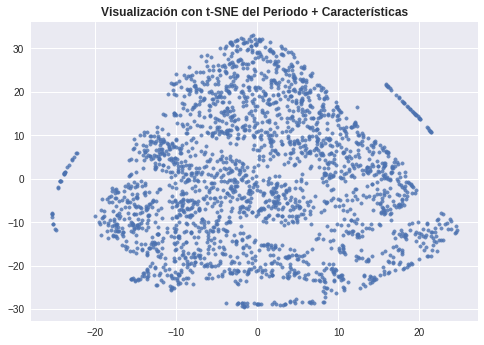

In [86]:
plt.scatter(x_tsne[subsample],y_tsne[subsample],alpha=0.8,marker='.')
plt.title('Visualización con t-SNE del Periodo + Características',fontweight='bold')
plt.savefig('tsne_features_2.eps',dpi=300,format='eps')

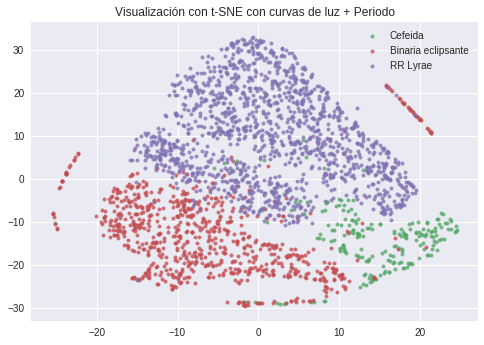

In [82]:
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in subsample:
  if t[i]==0 :
    x1.append(x_tsne[i])
    y1.append(y_tsne[i])
  elif t[i]==1:
    x2.append(x_tsne[i])
    y2.append(y_tsne[i])
  else:
    x3.append(x_tsne[i])
    y3.append(y_tsne[i])

plt.scatter(x1,y1,alpha=0.8,marker='.',c='C1',label='Cefeida')
plt.scatter(x2,y2,alpha=0.8,marker='.',c='C2',label='Binaria eclipsante')
plt.scatter(x3,y3,alpha=0.8,marker='.',c='C3',label='RR Lyrae')
plt.legend()
plt.title('Visualización con t-SNE con curvas de luz + Periodo')

plt.savefig('color_tsne_features_2.eps',dpi=300,format='eps')

# 3 Visualizar con t-SNE usando las Curvas de luz en fase

## 3.1 Cargar datos

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
#ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/LC_fase_B.pkl','rb') as f: 
  magB = pickle.load(f)

## 3.2 Entrenar t-SNE

In [0]:
X = np.array(magB) 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=700)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28604 samples in 0.222s...
[t-SNE] Computed neighbors for 28604 samples in 253.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28604
[t-SNE] Computed conditional probabilities for sample 2000 / 28604
[t-SNE] Computed conditional probabilities for sample 3000 / 28604
[t-SNE] Computed conditional probabilities for sample 4000 / 28604
[t-SNE] Computed conditional probabilities for sample 5000 / 28604
[t-SNE] Computed conditional probabilities for sample 6000 / 28604
[t-SNE] Computed conditional probabilities for sample 7000 / 28604
[t-SNE] Computed conditional probabilities for sample 8000 / 28604
[t-SNE] Computed conditional probabilities for sample 9000 / 28604
[t-SNE] Computed conditional probabilities for sample 10000 / 28604
[t-SNE] Computed conditional probabilities for sample 11000 / 28604
[t-SNE] Computed conditional probabilities for sample 12000 / 28604
[t-SNE] Computed conditional probabilities for s

## 3.3 Visualizar con 3 clases

In [0]:
t = np.zeros(len(Clase1), dtype=int)
for i in range(len(Clase1)):
  if Clase1[i]=='CEPH':
    t[i]=0
  elif Clase1[i]=='EB':
    t[i]=1
  else:
    t[i]=2

Text(0.5,1,'Visualización con t-SNE sólo con features')

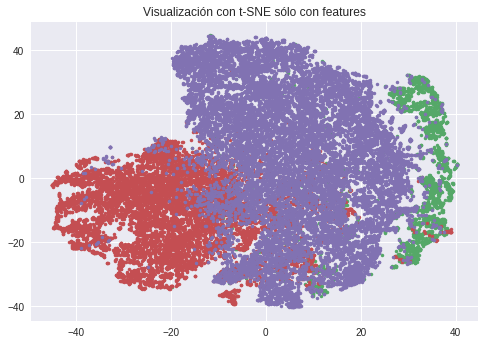

In [0]:
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in range(len(magB)):
  if t[i]==0 :
    x1.append(x_tsne[i])
    y1.append(y_tsne[i])
  elif t[i]==1:
    x2.append(x_tsne[i])
    y2.append(y_tsne[i])
  else:
    x3.append(x_tsne[i])
    y3.append(y_tsne[i])
plt.plot(x1,y1,'C1.')
plt.plot(x2,y2,'C2.')
plt.plot(x3,y3,'C3.')
plt.title('Visualización con t-SNE sólo con curvas de luz')

#plt.savefig('tSNE_0_perp30_iter1000.png')

# 4 Visualizar con t-SNE usando Curvas de luz en fase + Periodo

## 4.1 Cargar datos

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
#ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/LC_fase_B.pkl','rb') as f: 
  magB = pickle.load(f)
  
with open(ruta_base+'/clases.pkl','rb') as f: 
  datos1 = pickle.load(f)
    
Nombre , Clase1, Clase2 = datos1[0], datos1[1], datos1[2]
  
with open(ruta_base+'/datos.pkl','rb') as f:
  datos =  pickle.load(f)
  
Periodo = datos[1]

In [0]:
for i in range(len(magB)):
  magB[i]=magB[i].tolist()
  magB[i].insert(0,Periodo[i])
  magB[i]=np.array(magB[i])
  
magB = np.array(magB)

## 4.2 Entrenar t-SNE

In [31]:
X = magB 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=5, perplexity=35, n_iter=500)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 28604 samples in 0.063s...
[t-SNE] Computed neighbors for 28604 samples in 30.008s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28604
[t-SNE] Computed conditional probabilities for sample 2000 / 28604
[t-SNE] Computed conditional probabilities for sample 3000 / 28604
[t-SNE] Computed conditional probabilities for sample 4000 / 28604
[t-SNE] Computed conditional probabilities for sample 5000 / 28604
[t-SNE] Computed conditional probabilities for sample 6000 / 28604
[t-SNE] Computed conditional probabilities for sample 7000 / 28604
[t-SNE] Computed conditional probabilities for sample 8000 / 28604
[t-SNE] Computed conditional probabilities for sample 9000 / 28604
[t-SNE] Computed conditional probabilities for sample 10000 / 28604
[t-SNE] Computed conditional probabilities for sample 11000 / 28604
[t-SNE] Computed conditional probabilities for sample 12000 / 28604
[t-SNE] Computed conditional probabilities for s

## 4.3 Visualizar con 3 clases

In [0]:
t = np.zeros(len(Clase1), dtype=int)
for i in range(len(Clase1)):
  if Clase1[i]=='CEPH':
    t[i]=0
  elif Clase1[i]=='EB':
    t[i]=1
  else:
    t[i]=2

In [0]:
with open('tSNE_LC_periodo.pkl','wb') as f:
  pickle.dump([tsne_results[:,0] , tsne_results[:,1]],f)

In [0]:
with open('tSNE_LC_periodo.pkl','rb') as f:
  tsne_results = pickle.load(f)

In [0]:
import random
subsample=[]
for i in range(2500):
  r=random.randint(1,28604)
  if r not in subsample: subsample.append(r)
subsample.sort()

In [91]:
len(tsne_results[0])

28604

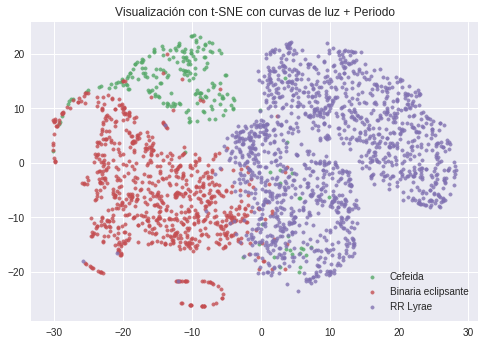

In [92]:
#x_tsne = tsne_results[:,0]
#y_tsne = tsne_results[:,1]
x_tsne = tsne_results[0]
y_tsne = tsne_results[1]
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in subsample:
  if t[i]==0 :
    x1.append(x_tsne[i])
    y1.append(y_tsne[i])
  elif t[i]==1:
    x2.append(x_tsne[i])
    y2.append(y_tsne[i])
  else:
    x3.append(x_tsne[i])
    y3.append(y_tsne[i])

plt.scatter(x1,y1,alpha=0.8,marker='.',c='C1',label='Cefeida')
plt.scatter(x2,y2,alpha=0.8,marker='.',c='C2',label='Binaria eclipsante')
plt.scatter(x3,y3,alpha=0.8,marker='.',c='C3',label='RR Lyrae')
plt.legend()
plt.title('Visualización con t-SNE con curvas de luz + Periodo')

plt.savefig('color_tsne_features.eps',dpi=300,format='eps')

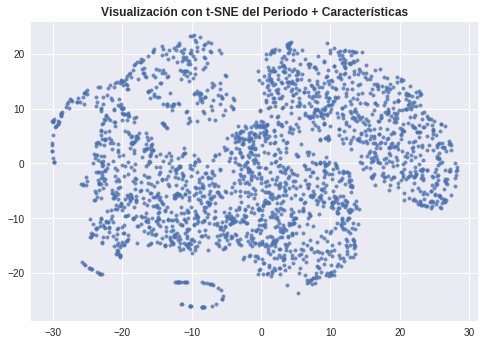

In [95]:
plt.scatter(x_tsne[subsample],y_tsne[subsample],alpha=0.8,marker='.')
plt.title('Visualización con t-SNE del Periodo + Características',fontweight='bold')
plt.savefig('tsne_LC_periodo.eps',dpi=300,format='eps')

Text(0.5,1,'Visualización con t-SNE con curvas de luz + Periodo')

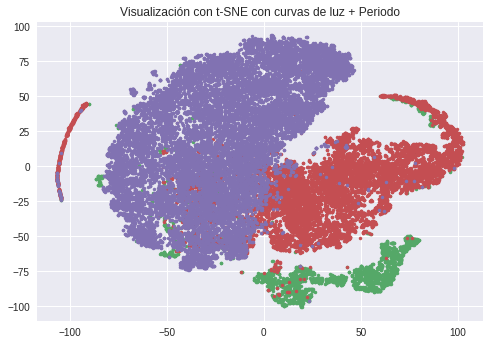

In [0]:
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in range(len(caracteristicas)):
  if t[i]==0 :
    x1.append(x_tsne[i])
    y1.append(y_tsne[i])
  elif t[i]==1:
    x2.append(x_tsne[i])
    y2.append(y_tsne[i])
  else:
    x3.append(x_tsne[i])
    y3.append(y_tsne[i])
plt.plot(x1,y1,'C1.')
plt.plot(x2,y2,'C2.')
plt.plot(x3,y3,'C3.')
plt.title('Visualización con t-SNE con curvas de luz + Periodo')

#plt.savefig('tSNE_0_perp30_iter1000.png')

# 5 Visualizar con t-SNE usando las Curvas de luz y features

## Cargar datos

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
#ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/LC_fase_B.pkl','rb') as f: 
  magB = pickle.load(f)

with open(ruta_base+'/clases.pkl','rb') as f: 
  datos1 = pickle.load(f)
    
Nombre , Clase1, Clase2 = datos1[0], datos1[1], datos1[2]

with open(ruta_base+'/char_B.pkl','rb') as f: 
  caracteristicas = pickle.load(f)
    

In [0]:
type(magB[0])

numpy.ndarray

In [0]:
caracteristicas = caracteristicas.tolist()
for i in range(len(caracteristicas)):
  caracteristicas[i]=caracteristicas[i]+magB[i].tolist()
  
caracteristicas = np.array(caracteristicas)

## Entrenar t-SNE

In [0]:
X = caracteristicas

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1500)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28604 samples in 0.274s...
[t-SNE] Computed neighbors for 28604 samples in 87.322s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28604
[t-SNE] Computed conditional probabilities for sample 2000 / 28604
[t-SNE] Computed conditional probabilities for sample 3000 / 28604
[t-SNE] Computed conditional probabilities for sample 4000 / 28604
[t-SNE] Computed conditional probabilities for sample 5000 / 28604
[t-SNE] Computed conditional probabilities for sample 6000 / 28604
[t-SNE] Computed conditional probabilities for sample 7000 / 28604
[t-SNE] Computed conditional probabilities for sample 8000 / 28604
[t-SNE] Computed conditional probabilities for sample 9000 / 28604
[t-SNE] Computed conditional probabilities for sample 10000 / 28604
[t-SNE] Computed conditional probabilities for sample 11000 / 28604
[t-SNE] Computed conditional probabilities for sample 12000 / 28604
[t-SNE] Computed conditional probabilities for sa

## Visualizar con 3 clases

In [0]:
t = np.zeros(len(Clase1), dtype=int)
for i in range(len(Clase1)):
  if Clase1[i]=='CEPH':
    t[i]=0
  elif Clase1[i]=='EB':
    t[i]=1
  else:
    t[i]=2

Text(0.5,1,'Visualización con t-SNE con curvas de luz + Features')

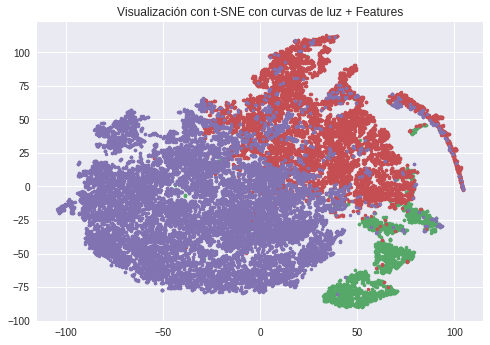

In [0]:
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in range(len(caracteristicas)):
  if t[i]==0 :
    x1.append(x_tsne[i])
    y1.append(y_tsne[i])
  elif t[i]==1:
    x2.append(x_tsne[i])
    y2.append(y_tsne[i])
  else:
    x3.append(x_tsne[i])
    y3.append(y_tsne[i])
plt.plot(x1,y1,'C1.')
plt.plot(x2,y2,'C2.')
plt.plot(x3,y3,'C3.')
plt.title('Visualización con t-SNE con curvas de luz + Features')

#plt.savefig('tSNE_0_perp30_iter1000.png')

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(caracteristicas)
t1=kmeans.labels_

In [0]:
import collections
collections.Counter(t1)

Counter({0: 28307, 1: 39, 2: 258})

Text(0.5,1,'Visualización con t-SNE con curvas de luz + Features')

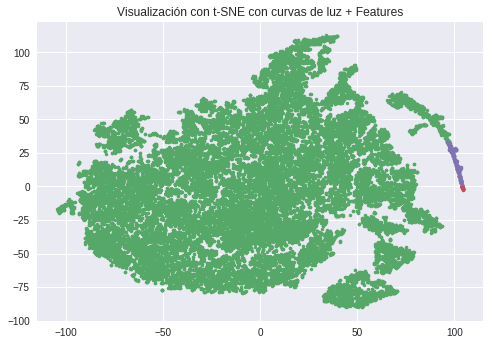

In [0]:
x_tsne = tsne_results[:,0]
y_tsne = tsne_results[:,1]
x1,x2,x3,y1,y2,y3 = [],[],[],[],[],[]
for i in range(len(caracteristicas)):
  if t1[i]==0 :
    x1.append(x_tsne[i])
    y1.append(y_tsne[i])
  elif t1[i]==1:
    x2.append(x_tsne[i])
    y2.append(y_tsne[i])
  elif t1[i]==2:
    x3.append(x_tsne[i])
    y3.append(y_tsne[i])
plt.plot(x1,y1,'C1.')
plt.plot(x2,y2,'C2.')
plt.plot(x3,y3,'C3.')
plt.title('Visualización con t-SNE con curvas de luz + Features')